### *"Never let the fear of striking out keep you from playing the game."* - Babe Ruth

----

YOUR NAME HERE: Travis Kerr

----

# Lab: Scatter Plots!

---

## Add to your cheat sheet!

Add info about scatter plots from this lab to your cheat sheet, so that you can easily look things up when working on your final project.

---

### Setting up our data ###

Import the needed packages by running this cell.

In [1]:
import numpy as np                 #for processing arrays (columns)
import pandas as pd                #for processing dataframes  (tables)
import sqlite3 as sql              #for SQL of course!
import matplotlib.pyplot as plt    #for making visualizations!
plt.style.use('fivethirtyeight')   #A helpful style package

The table `actors` contains data on Hollywood actors, both male and female. The columns are:

| Column        | Contents |
|---------------------|----------|
|`actor`              | Name of actor |
|`total_gross`        | Total gross domestic box office receipt, in millions of dollars, of all of the actor's movies |
| `number_of_movies`  | The number of movies the actor has been in |
| `no1_movie`          | The highest grossing movie the actor has been in |
| `gross`             | Gross domestic box office receipt, in millions of dollars, of the actor's `#1 Movie` |

In the calculation of the gross receipt, the data tabulators did not include movies where an actor had a cameo role or a speaking role that did not involve much screen time.

The table has 50 rows, corresponding to the 50 top grossing actors. The table is already sorted by `Total Gross`, so it is easy to see that Harrison Ford is the highest grossing actor. In total, his movies have brought in more money at domestic box office than the movies of any other actor.

In [24]:
try:
    
    #Read in the needed csvs and create the DB
    
    actors = pd.read_csv("actors.csv")
    
    #create a db to hold a table with the csv information
    conn = sql.connect('actors.db')
    
    #dump the csv contents into a table in the DB
    actors.to_sql('actors', conn,  index = False)

except:   
    print("Issue during DB creation/connection")

Issue during DB creation/connection


In [25]:
sql_statement = """SELECT * FROM actors"""

actors = pd.read_sql_query(sql_statement, conn)
actors

,actor,total_gross,number_of_movies,no1_movie,gross
0,Harrison Ford,4871.7,41,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,The Avengers,623.4
2,Morgan Freeman,4468.3,61,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,The Avengers,623.4
5,Eddie Murphy,3810.4,38,Shrek 2,441.2
6,Tom Cruise,3587.2,36,War of the Worlds,234.3
7,Johnny Depp,3368.6,45,Dead Man's Chest,423.3
8,Michael Caine,3351.5,58,The Dark Knight,534.9
9,Scarlett Johansson,3341.2,37,The Avengers,623.4


### Scatter Plots ###
A *scatter plot* displays the relationship between two numerical variables. 

Recall that we have imported the matplotlib plotting library as ```plt```.  We rely on ```plt``` to make the visualizations.  The method ```scatter``` from the ```plt``` package draws a scatter plot consisting of one point for each row of the table. 

As with line graphs, sensibly, you must pass these 2 pieces of information to the ``scatter`` function:

* first give the column whose data will appear on the horizontal axis 
* and then give the column whose data will appear on the vertical axis. 

Text(0, 0.5, 'Total Gross (Millions)')

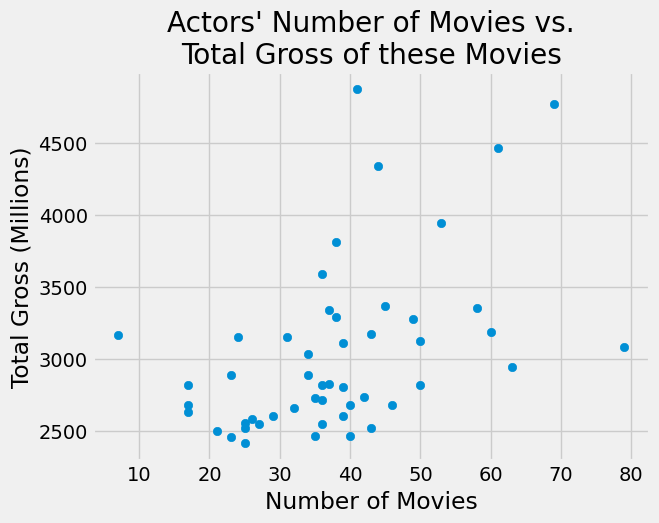

In [4]:
#Example of making a scatter plot
plt.scatter(actors['number_of_movies'], actors['total_gross'])
plt.title("Actors' Number of Movies vs.\nTotal Gross of these Movies")
plt.xlabel('Number of Movies')
plt.ylabel('Total Gross (Millions)')

Notice that the ylabel includes the units (millions of dollars).  **Your labels should ALWAYS indicate the units of the variable.**

The plot contains 50 points, one point for each actor in the table. You can see that it slopes upwards, in general. The more movies an actor has been in, the more the total gross of all of those movies – in general.

Formally, we say that the plot shows an *association* between the variables, and that the association is *positive*: high values of one variable tend to be associated with high values of the other, and low values of one with low values of the other, in general. 

Of course there is some variability. Some actors have high numbers of movies but middling total gross receipts. Others have middling numbers of movies but high receipts. **That the association is positive is simply a statement about the broad general trend.**

### The Correlation Coefficient (r) ###

One way to quantify association is to use (Pearson's) correlation coefficient.  To calculate the coefficient by hand, you'd have to plug all the (x,y) points from the scatter plot above into a formula.  This forumula always generates a number between -1 and +1.

We'll never calculate the correlation coefficient by hand so you don't need to know the formula. Instead, we'll just have Python calculate it for us via the ``corr()`` function that must be run on a dataframe, as shown in the below cell.  

In [5]:
corr_df = actors.corr()
corr_df

<ipython-input-5-3126b1ee61a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = actors.corr()


,total_gross,number_of_movies,gross
total_gross,1.000000,0.474609,0.385570
number_of_movies,0.474609,1.000000,-0.158148
gross,0.385570,-0.158148,1.000000


### Did you get a warning from the above cell?

If so, let's fix that.   If not, just read and learn anyway.

The issue is that not all of the columns frmo the table are numeric.  So to tell the ``corr`` function that you want to ignore the All you have to do is add a parameter,  ```numeric_only = True```, which indicates that you want only the numeric columns to be considered.

In [6]:
actors.corr(numeric_only = True)  #replace the ellipsis with numeric_only = True


,total_gross,number_of_movies,gross
total_gross,1.000000,0.474609,0.385570
number_of_movies,0.474609,1.000000,-0.158148
gross,0.385570,-0.158148,1.000000


### Interpreting the correlation coefficients table

As you can see in the table above, the ``corr()`` method returns a dataframe where all entries are in the interval \[-1, 1\].  Each of the numbers in the table is the correlation coefficient between the row and column variables.  For example: 

* The correlation coefficient between the `Total Gross` and `Number of Movies` is 0.474609. 

* The correlation coefficient between the `total_gross` and `gross` is 0.385570.    (Recall the gross column is just the gross of the actor's no. 1 movie.

* The diagonals contain a value of 1.00000 because any variable is deeply correlated with itself, ie, always matches itself. 

Notice that 0.474609 and 0.385570 both appear twice.  This is because whether you find the association between `Total Gross` and the `Number of Movies` or instead between the `Number of Movies` and `Total Gross`, you should get the same value.  Because of this commutativity, the correlation matrix is always *symmetric* down the diagonal, ie, corresponding entries are the same when you fold the matrix diagonally onto itself.

If you wanted to get the correlation coefficient from the table without hardcoding, you could do the following.  Here we use 2 sets of hard brackets to select the ``Total Gross`` column and then the desired row, ``Number of Movies``.

In [7]:
r = corr_df["total_gross"]["number_of_movies"]  #We are choosing the column "Total Gross"
                                                #and then the row with label "Number of movies"
r

0.47460879537420464

And thanks to the symmetry of the correlation table, you could have swapped the order, like below.

In [ ]:
r = corr_df["number_of_movies"]["total_gross"]  #Now we are choosing the column "Number of movies"
                                                #and then the row with label "Total Gross"
r

0.47460879537420464

How do you interpret 0.474609?  Well, this number indicates that the `total_gross` and the `number_of_movies` have a positive linear association of *moderate* strength.  Why "moderate"?  Because  0.474609 is somewhere in the middle of 0 and 1, so not super weak and not super strong. Here are some guidelines for how to interpret the correlation coefficient values. (This chart is pretty typical in an intro stats class and more can be read about the correlation coefficient [here](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/).)

* Exactly –1: A perfect downhill (negative) linear relationship
* –0.70: A strong downhill (negative) linear relationship
* –0.50: A moderate downhill (negative) relationship
* –0.30: A weak downhill (negative) linear relationship
* 0: No linear relationship (But remember the parabola example - "r=0" might not mean "no relationship at all"!)
* +0.30: A weak uphill (positive) linear relationship
* +0.50: A moderate uphill (positive) relationship
* +0.70: A strong uphill (positive) linear relationship
* Exactly +1: A perfect uphill (positive) linear relationship

Now that we have explored how the number of movies is related to the *total* gross receipt, let's turn our attention to how it is related to the *average* gross receipt per movie.

---

# Question 1

A) Using SQL, create a dataframe that will allow you to analyze the number of movies versus a new variable called ```average_per_movie``` column.  This new column should be the total gross divided by number of movies.

In [26]:
sql_statement = """
                SELECT number_of_movies, total_gross/number_of_movies AS average_per_movie
                FROM actors

                """

actors_avg_gross = pd.read_sql_query(sql_statement, conn)  #Store the query results into a table called actors_avg_gross
actors_avg_gross                                           #rewrite actors_avg_gross to see what is inside this dataframe

,number_of_movies,average_per_movie
0,41,118.821951
1,69,69.171014
2,61,73.250820
3,44,98.654545
4,53,74.477358
5,38,100.273684
6,36,99.644444
7,45,74.857778
8,58,57.784483
9,37,90.302703


B) Below, create a scatter plot showing number of movies versus the new ```average_per_movie``` variable for each actor.  

Meet these requirements:
* The x axis label should be: Number of Movies
* The y axis label should be the following, where you replace ??? with the units: Average Gross (???)
* The title of the graph should be "Actors' Number of Movies vs.\nAverage Gross Per Movie".  Notice that the `\n` in the middle just splits the title into two lines.
* Make the y axis span from 0 to 550. By making it go past 500, we will actually see a horizontal line at 500.
* Make the x axis show these tick marks: 0, 10, 20, 30, 40, 50, 60, 70, 80, 90

([<matplotlib.axis.XTick at 0x7f61ca229ac0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

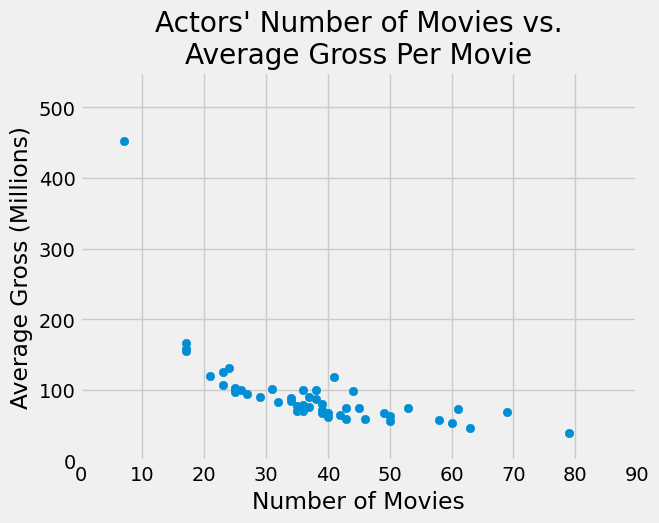

In [27]:
#Make your scatter plot here, per the specifications.
plt.scatter(actors_avg_gross['number_of_movies'], actors_avg_gross['average_per_movie'])
plt.title("Actors' Number of Movies vs.\nAverage Gross Per Movie")
plt.xlabel('Number of Movies')
plt.ylabel('Average Gross (Millions)')
plt.ylim(0, 550)
plt.xticks(np.arange(0, 100, 10))

C) This is a markedly different picture than before and shows a *negative* association. In general, the more movies an actor has been in, the *less* the average receipt per movie.

Let's calculate the correlation coefficient between these variables.  We expect it to be negative.

In [ ]:
#Generate the correlation table for these 2 variables

new_corr = actors_avg_gross.corr()
new_corr

,number_of_movies,average_per_movie
number_of_movies,1.000000,-0.627324
average_per_movie,-0.627324,1.000000


D) Now set a python variable equal to the correct correlation *without hardcoding*, ie, use the double bracket notation explained above to store the value of the coefficient into the variable r.

In [ ]:
r_num_movies_vs_avg_gross = new_corr["average_per_movie"]["number_of_movies"]  #name the correlation table r_num_movies_vs_avg_gross
r_num_movies_vs_avg_gross #rewrite r_num_movies_vs_avg_gross to see the output

-0.6273237981087157

C) Using our guidelines above, does this show a weak/strong/moderate relationship between the variables?  Explain.

*The correlation that showed was a moderately negative relationship between these columns with a correlation of -0.6273*

Click __here__ to see one nice answer.
<!-- 
*A correlation of -0.6273 shows a moderatly strong negative linear relationship between the variables, meaning, as the number of movies increases, the average per movie tends to decrease.  This may make sense since even great actors likely have more flops than superstar successes in their careers so the average is brought down by these flops.*
-->

---

### Outliers affect the correlation coefficient

In Question 1, notice that one of the points is quite high and off to the left of the plot. It corresponds to one actor who has a low number of movies and high average per movie. This point is an *outlier*. It lies outside the general range of the data. Indeed, it is quite far from all the other points in the plot.

We now will examine the negative association further by looking at points on the right/left ends of the plot. 

Let's zoom in on the main body of the plot by just looking at the portion that doesn't have that left outlier on the left.

In [ ]:
 #Get all rows of the original table where the number of movies is above 10
sql_statement = """
                SELECT * 
                FROM actors
                WHERE number_of_movies > 10
                """

actors_no_outlier = pd.read_sql_query(sql_statement, conn)
actors_no_outlier

,actor,total_gross,number_of_movies,no1_movie,gross
0,Harrison Ford,4871.7,41,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,The Avengers,623.4
2,Morgan Freeman,4468.3,61,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,The Avengers,623.4
5,Eddie Murphy,3810.4,38,Shrek 2,441.2
6,Tom Cruise,3587.2,36,War of the Worlds,234.3
7,Johnny Depp,3368.6,45,Dead Man's Chest,423.3
8,Michael Caine,3351.5,58,The Dark Knight,534.9
9,Scarlett Johansson,3341.2,37,The Avengers,623.4


Here's a technicality you might hit often.

Notice that the table above does not have the ```average_per_movie``` column because this column is not in the original database table.  Instead, we computed that column via our sql query.  We have 2 options: We can either change the query above to recalculate the average per movie  OR we can just use Python to compute that new column.

To add a new column to a Python dataframe, just use hardbracket notation.

* ```my_dataframe["new_column_name"] = some computation with other columns```

Fill in the ellipsis below to get some practice with adding a new column using Python.

In [ ]:
#Change the ellipsis below so that:
#  The first ellipsis is replaced by the NEW column name:  average_per_movie
#  The second is replaced by what we want to be the numerator: the total gross for the actor
#  The third is replaced by what we want to be in the denominator:  the number of the movies of the actor

actors_no_outlier["average_per_movie"] = actors_no_outlier["total_gross"] / actors_no_outlier["number_of_movies"]
actors_no_outlier

,actor,total_gross,number_of_movies,no1_movie,gross,average_per_movie
0,Harrison Ford,4871.7,41,Star Wars: The Force Awakens,936.7,118.821951
1,Samuel L. Jackson,4772.8,69,The Avengers,623.4,69.171014
2,Morgan Freeman,4468.3,61,The Dark Knight,534.9,73.250820
3,Tom Hanks,4340.8,44,Toy Story 3,415.0,98.654545
4,"Robert Downey, Jr.",3947.3,53,The Avengers,623.4,74.477358
5,Eddie Murphy,3810.4,38,Shrek 2,441.2,100.273684
6,Tom Cruise,3587.2,36,War of the Worlds,234.3,99.644444
7,Johnny Depp,3368.6,45,Dead Man's Chest,423.3,74.857778
8,Michael Caine,3351.5,58,The Dark Knight,534.9,57.784483
9,Scarlett Johansson,3341.2,37,The Avengers,623.4,90.302703


And now we build the scatter plot that is missing the one outlier!

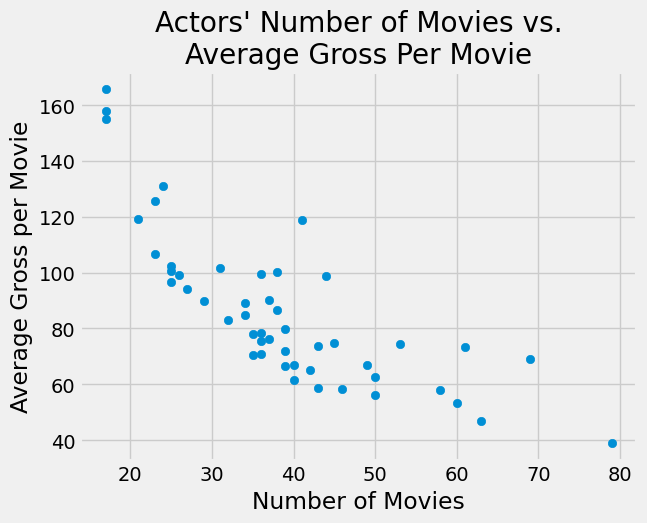

In [ ]:
plt.scatter(actors_no_outlier['number_of_movies'], actors_no_outlier['average_per_movie'])
plt.title("Actors' Number of Movies vs.\nAverage Gross Per Movie")
plt.xlabel('Number of Movies')
plt.ylabel('Average Gross per Movie');

The negative association is still clearly visible.  Let's check out the correlation coefficient now that this one outlier has been removed.

In [ ]:
#If you get a warning, set numeric_only to true

corr_matrix = actors_no_outlier.corr(numeric_only = True)    
corr_matrix

,total_gross,number_of_movies,gross,average_per_movie
total_gross,1.000000,0.510861,0.406809,-0.028949
number_of_movies,0.510861,1.000000,-0.037520,-0.784640
gross,0.406809,-0.037520,1.000000,0.287327
average_per_movie,-0.028949,-0.784640,0.287327,1.000000


So the correlation coefficient between ```average_per_movie``` and ```number_of_movies``` went from about -0.6273 to about -0.7846, bumping the correlation up considerably.

From this, you should learn that **outliers can deeply affect the correlation coefficient**!  Without that outlier, we have a strong negative linear relationship amongst the points.

**Before moving on, you might want to add to your cheat sheet how to add a new column using Python.**

---

# **Question 2**

Let's identify the actors corresponding to the points that lie on the right hand side of the plot.  These are the actors who have made a large number of movies.

Generate a table with all actors who made more than 60 movies.

In [ ]:
#Get all rows with actors who made more than 60 movies.
sql_statement = """
                SELECT * 
                FROM actors
                WHERE number_of_movies > 60
                """

actors_more_than_60_movies = pd.read_sql_query(sql_statement, conn)
actors_more_than_60_movies

,actor,total_gross,number_of_movies,no1_movie,gross
0,Samuel L. Jackson,4772.8,69,The Avengers,623.4
1,Morgan Freeman,4468.3,61,The Dark Knight,534.9
2,Robert DeNiro,3081.3,79,Meet the Fockers,279.3
3,Liam Neeson,2942.7,63,The Phantom Menace,474.5


Who had the highest number of movies? (**To decide, Change your query above so that the results are SORTED.**)  Write the name of this person below.

*Robert DeNiro.*

---

Notice from the scatter plot, that rightmost point has the the highest number of movies and the lowest average receipt per movie.  And the previous question showed us that this point corresponds to the great actor Robert DeNiro. Other fine actors are at points that are not very far away, but DeNiro's is at the extreme right end.

To understand the negative association, note that the more movies an actor is in, the more variable those movies might be, in terms of style, genre, and box office draw. For example, an actor might be in some high-grossing action movies or comedies (such as Meet the Fockers), and also in a large number of smaller films that may be excellent but don't draw large crowds. Thus the actor's value of average receipts per movie might be relatively low.

---

# **Question 3**

To approach this argument from a different direction, let us now take a look at the outlier in your scatter plot from Question 1b, ie, the point in the upper left hand corner that had a very low number of movies and a high avergae gross.  

Generate a sql statement that returns **exactly one row**, the row correspoding to that outlier.  Notice that this outlier was the only actor who made less than 10 movies.  You can use this information when writing your query.

In [28]:
#Find the outlier's information!
sql_statement = """ SELECT *
                    FROM actors
                    WHERE number_of_movies < 10"""

actors_less_than_10_movies = pd.read_sql_query(sql_statement, conn)
actors_less_than_10_movies

,actor,total_gross,number_of_movies,no1_movie,gross
0,Anthony Daniels,3162.9,7,Star Wars: The Force Awakens,936.7


Who had the highest average per movie? Write your answer below.

*Anthony Daniels.*

---

Your answer should have been Anthony Daniels.  Anthony Daniels might not have the stature of Robert DeNiro, but his 7 movies had an astonishingly high average receipt of nearly $452$ million dollars per movie.

What were these movies? You might know about the droid C-3PO in Star Wars:

![C-3PO](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/C-3PO_droid.png)

That's [Anthony Daniels](https://en.wikipedia.org/wiki/Anthony_Daniels) inside the metallic suit. He plays C-3PO.

Mr. Daniels' entire filmography (apart from cameos) consists of movies in the high-grossing Star Wars franchise. That explains both his high average receipt and his low number of movies.

Variables such as genre and production budget have an effect on the association between the number of movies and the average receipt per movie. This example is a reminder that studying the association between two variables often involves understanding other related variables as well. 

---

Let's close the actors database connection as we are moving on to another  data set.

In [29]:
conn.close()

---

###  Time to stop the games...

Recall the GameStop example from last lab.  Let's read in the data again.

In [30]:
try:
    #Read in the needed csvs and create the DB
    game_stop = pd.read_csv("game_stop.txt", parse_dates=["date"]) #Thanks to parse_Dates, the Date column 
                                                               #is recognized as time and not just a string
    
    #create a db to hold a table with the csv information
    conn2 = sql.connect('game_stop.db')
    
    #dump the csv contents into a table in the DB
    game_stop.to_sql('game_stop', conn2,  index = False)

except:
    
    print("Issue during DB creation/connection")

Issue during DB creation/connection


In [31]:
sql_statement = """SELECT * FROM game_stop """

game_stop = pd.read_sql_query(sql_statement, conn2)  #Call the results game_stop
game_stop

,date,open,high,low,close,adj_close,volume
0,2020-09-29 00:00:00,10.000000,10.650000,9.930000,10.350000,10.350000,5237600
1,2020-09-30 00:00:00,10.250000,10.760000,10.060000,10.200000,10.200000,6079000
2,2020-10-01 00:00:00,10.090000,10.250000,9.690000,9.770000,9.770000,4554100
3,2020-10-02 00:00:00,9.380000,9.780000,9.300000,9.390000,9.390000,4340500
4,2020-10-05 00:00:00,9.440000,9.590000,9.250000,9.460000,9.460000,2805000
...,...,...,...,...,...,...,...
248,2021-09-23 00:00:00,192.330002,195.750000,190.600006,191.240005,191.240005,1682300
249,2021-09-24 00:00:00,191.000000,191.720001,184.110001,185.160004,185.160004,1679900
250,2021-09-27 00:00:00,185.919998,192.050003,185.869995,189.479996,189.479996,1470100
251,2021-09-28 00:00:00,188.000000,190.809998,178.000000,178.600006,178.600006,1770500


---

# **Question 4**

A) Create a scatter plot for the Closing Values vs. Opening Values of each day in our data set.  

Be sure, as always, to ive a tile and label your x axis and y axis.

Text(0, 0.5, 'Opening Values')

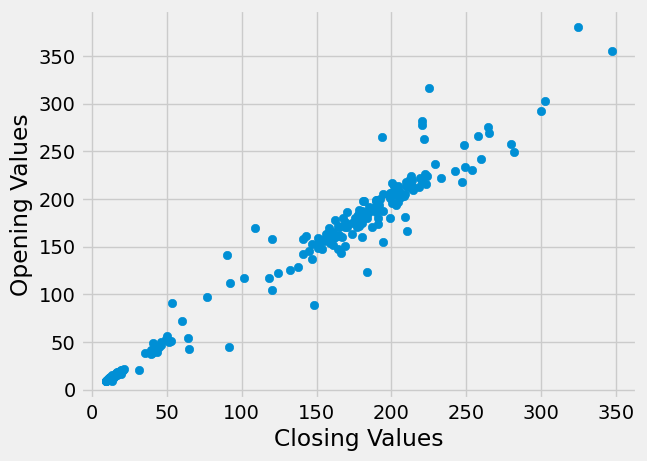

In [32]:
#Creat a plot with a title and x/y axis labels
plt.scatter(game_stop["close"], game_stop["open"])
plt.xlabel("Closing Values")
plt.ylabel("Opening Values")

B) Find the correlation coefficient of the closing versus opening prices.

In [33]:
corr_table = game_stop.corr()
corr_table

<ipython-input-33-a42b77db8481>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_table = game_stop.corr()


,open,high,low,close,adj_close,volume
open,1.000000,0.983216,0.978490,0.984208,0.984208,-0.082950
high,0.983216,1.000000,0.946109,0.972841,0.972841,0.006841
low,0.978490,0.946109,1.000000,0.987950,0.987950,-0.170965
close,0.984208,0.972841,0.987950,1.000000,1.000000,-0.085769
adj_close,0.984208,0.972841,0.987950,1.000000,1.000000,-0.085769
volume,-0.082950,0.006841,-0.170965,-0.085769,-0.085769,1.000000


In [34]:
# Set the variable to the correlation coefficent between open and close
r_close_vs_open = corr_table["close"]["open"]
r_close_vs_open

0.9842078904745033

C)  The scatter plot and correlation coefficient suggest a **very strong**, almost perfect correlation.  Why does that make sense, given the context of this data?

*After looking at the game stops daily stock prices, there won't be a major change throughout the course of the day. Prices will almost stay the same.* 

Click __here__ for a nice answer.
<!-- Yowsers!  .98 means the (open, close) points almost lie on a straight line!  This makes sense though.  While there might be a lot of variability amongst stock prices over many days, at least for game stop, there were not too many days with huge drop/gain throughout the course of a single day.  In other words, on days where the stock price starts high, the price tends to end high too, and vice versa.--> 

---

### Using scatter plots to plot special points.

Scatter plots draw dots.  This means we can use the ``plt.scatter`` function to draw special dots on other graphs.

We can use this code to highlight a red dot at the point *(x,y)* on a graph:  

* ``plt.scatter(x, y, color = "red")``

And if we want to change the size of the red dot, we can play with the ```s``` parameter:

* ``plt.scatter(x, y, color = "red", s=100)``   This makes the size of the dot 100.

Let's get practice with this now by putting a red dot on a line graph.   In particular, we'll highlight the point with the greatest closing value.

Recall this line graph from the last lab.

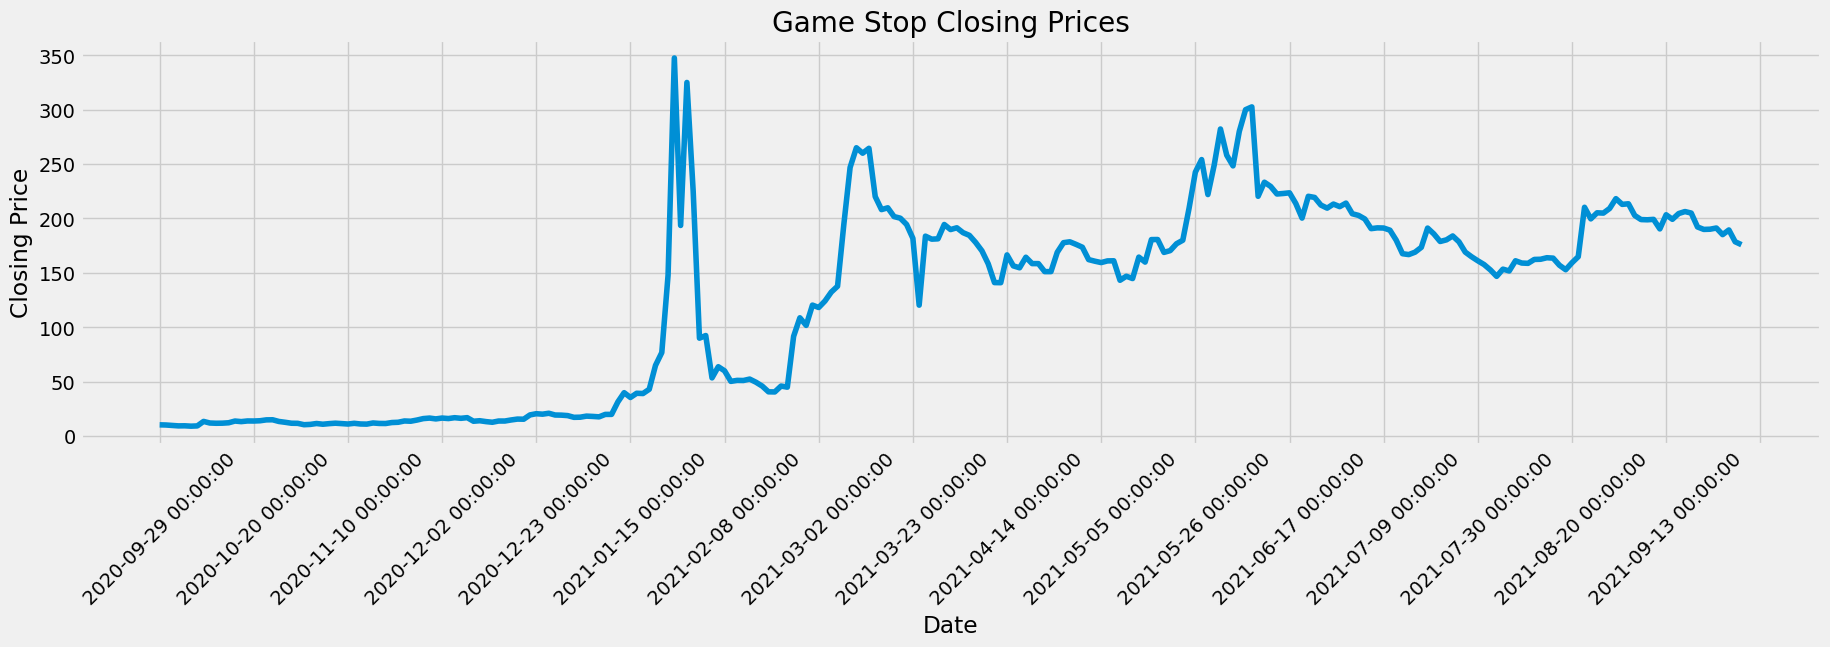

In [17]:
#Plot from last lab
plt.figure(figsize =(20,5))
plt.plot(game_stop["date"], game_stop['close'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Game Stop Closing Prices")
plt.xticks(np.arange(0,270,15), rotation=45);

###  Aside: How to know what numbers to use with ```np.arange```

One quick aside based on some questions I got.   Students were not sure what second number to use in ```np.arange```.

If you don't want to think hard about what numbers to use, then you can always just generate a list starting at 0, ending 1 past the last row index, and skipping by ```xxx``` by using this line.

* ```np.arange(0, len(game_stop), xxx)  #The len of the game_stop table is always 1 past the last row index.```

So the cell below creates the same graph ending at the same place as above.

If the above command makes your life easier, add it to your cheatsheet.

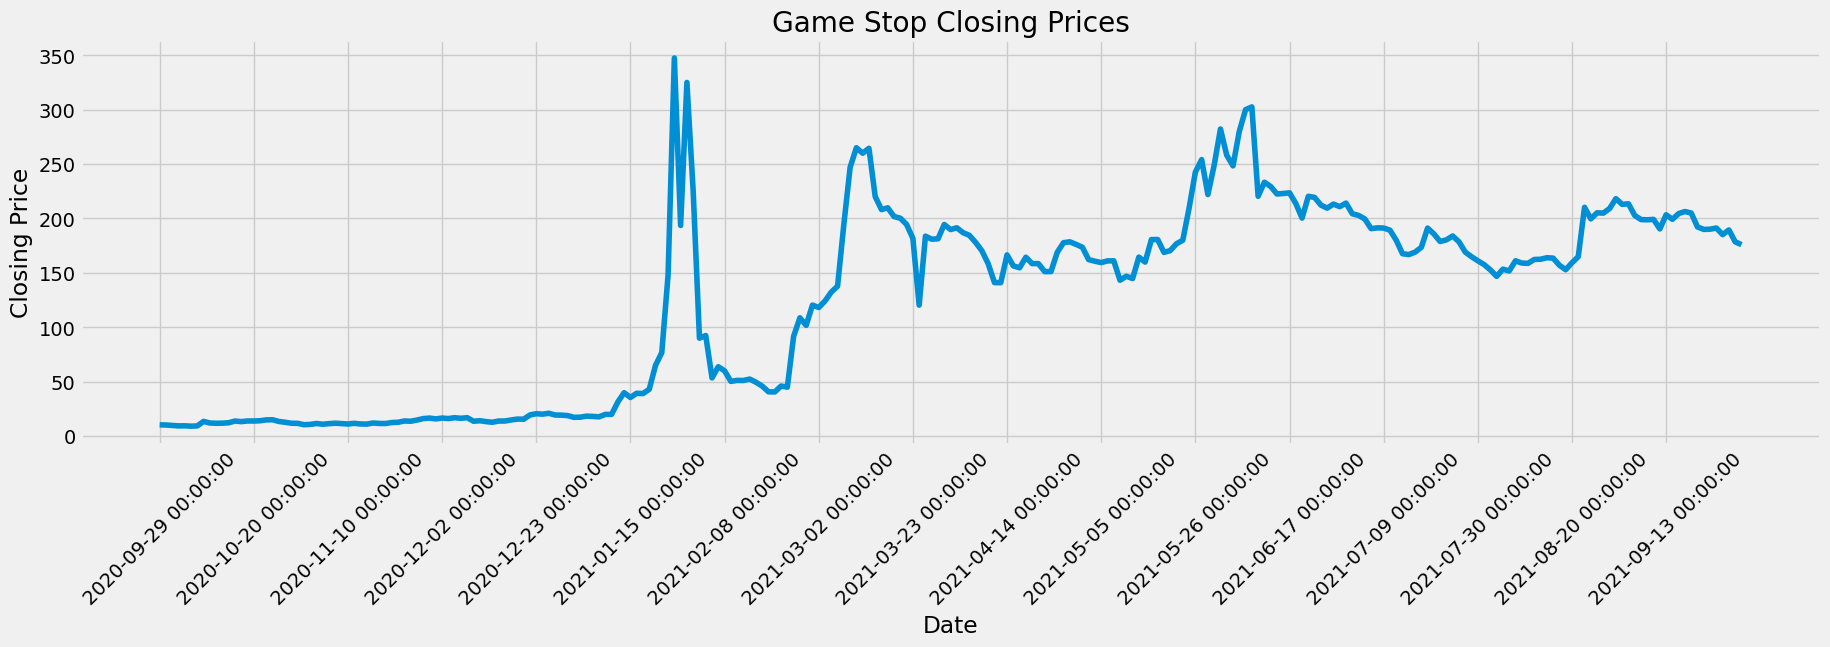

In [18]:
plt.figure(figsize =(20,5))
plt.plot(game_stop["date"], game_stop['close'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Game Stop Closing Prices")
plt.xticks(np.arange(0,len(game_stop),15), rotation=45);   #This is the new line

How pretty! Don't you agree?  Okay, let's plot that red point on this graph and make it even better.

---

# **Question 5**

We'll label the date of the highest closing price of the GameStop stock with a red dot on our line graph.


A) Write a SQL Query to retrieve exactly one row - The row that corresponds to the peak/highest closing price. 

Hint...use LIMIT.

In [19]:
sql_statement = """SELECT *
                  FROM game_stop
                  ORDER BY close DESC
                  LIMIT 1"""

game_stop_peak = pd.read_sql_query(sql_statement, conn2)  #Call the results game_stop
game_stop_peak

,date,open,high,low,close,adj_close,volume
0,2021-01-27 00:00:00,354.829987,380.0,249.0,347.51001,347.51001,93396700


B) Now use Python and the double bracket notation to set the peak date/closing price variables below.

In [42]:
#If you do this right, you'll see this printed:  ('2021-01-27', 347.51001)

peak_date = game_stop_peak["date"]
peak_closing_price = game_stop_peak["close"]
peak_date, peak_closing_price

(0    2021-01-27 00:00:00
 Name: date, dtype: object,
 0    347.51001
 Name: close, dtype: float64)

C) Now we will plot a red dot for the peak closing price.!

**Use the ``peak_date``, ``peak_closing_price`` variables within the ``plt.scatter(..., ..., color = "red")`` function to plot a red point for this peak.**

Ellipsis

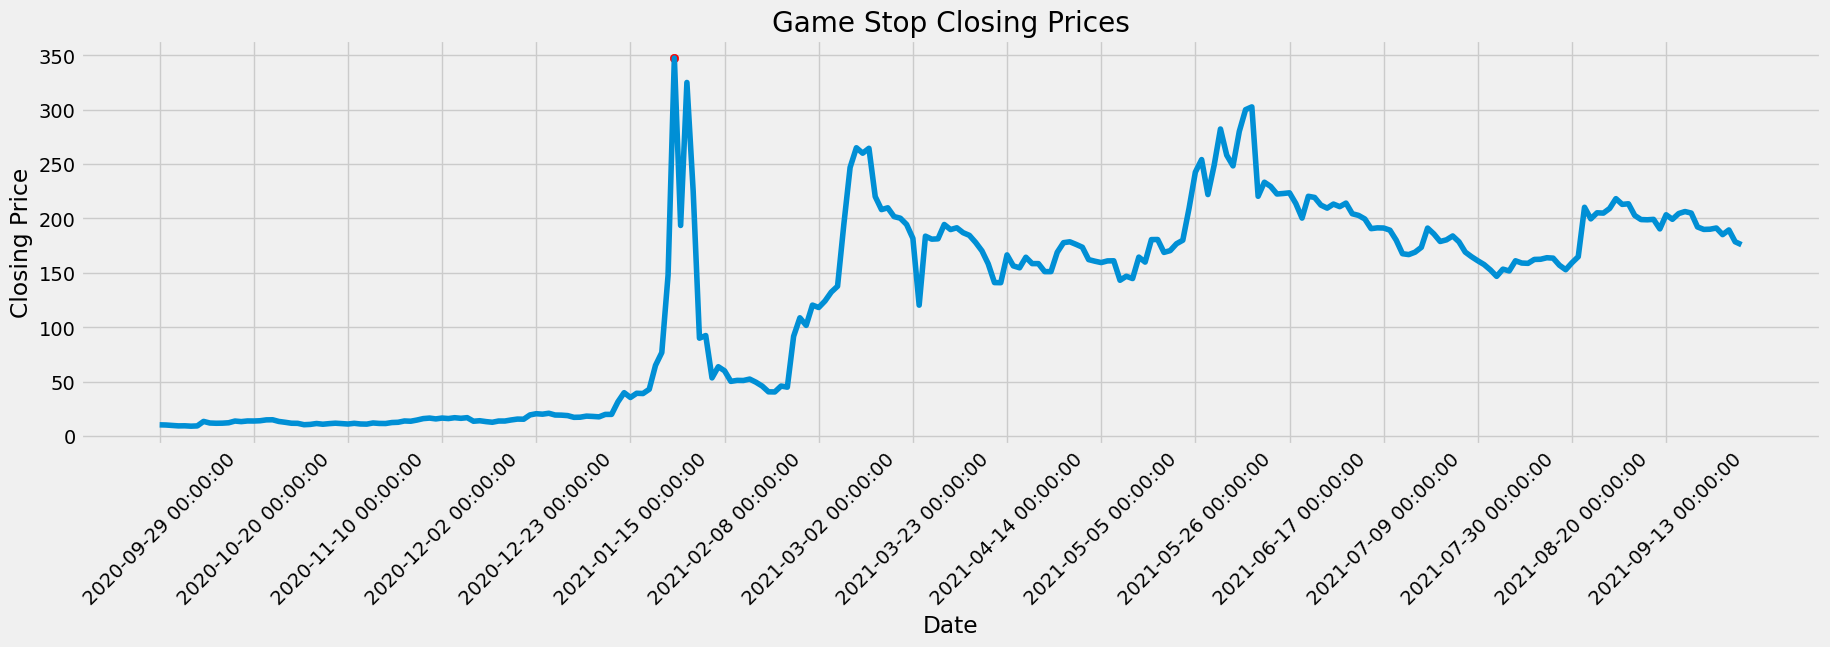

In [43]:
#This is the same code from above that produces the line graph
plt.figure(figsize =(20,5))
plt.plot(game_stop["date"], game_stop['close'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Game Stop Closing Prices")
plt.xticks(np.arange(0,len(game_stop),15), rotation=45)
plt.scatter(peak_date, peak_closing_price, color = "red");

#Add one line of code below to plot the peak date/closing price here
#use the variables you created in part B!!!

...

D) The dot will look small so change its size to 100 too by adding this to the list of parameters: ```s=100```

Also, likely, your red dot will appear BEHIND the blue curve, so use the ``zorder`` parameter to correct this.  Thw ``zorder`` parameter defines the order of which graphs should be drawn first:

* add a parameter ``zorder=1`` to the ``plt.plot(...)`` line of code 
* and a parameter ``zorder=2`` to the ``plt.scatter(...)`` line of code 

Thus, the red dot is drawn 2nd and thus appears on top of the blue line graph.

When done, your graph should look like this:  [Click here for what the graph should look line when done.](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS260/main/game_stop_red_dot.png)

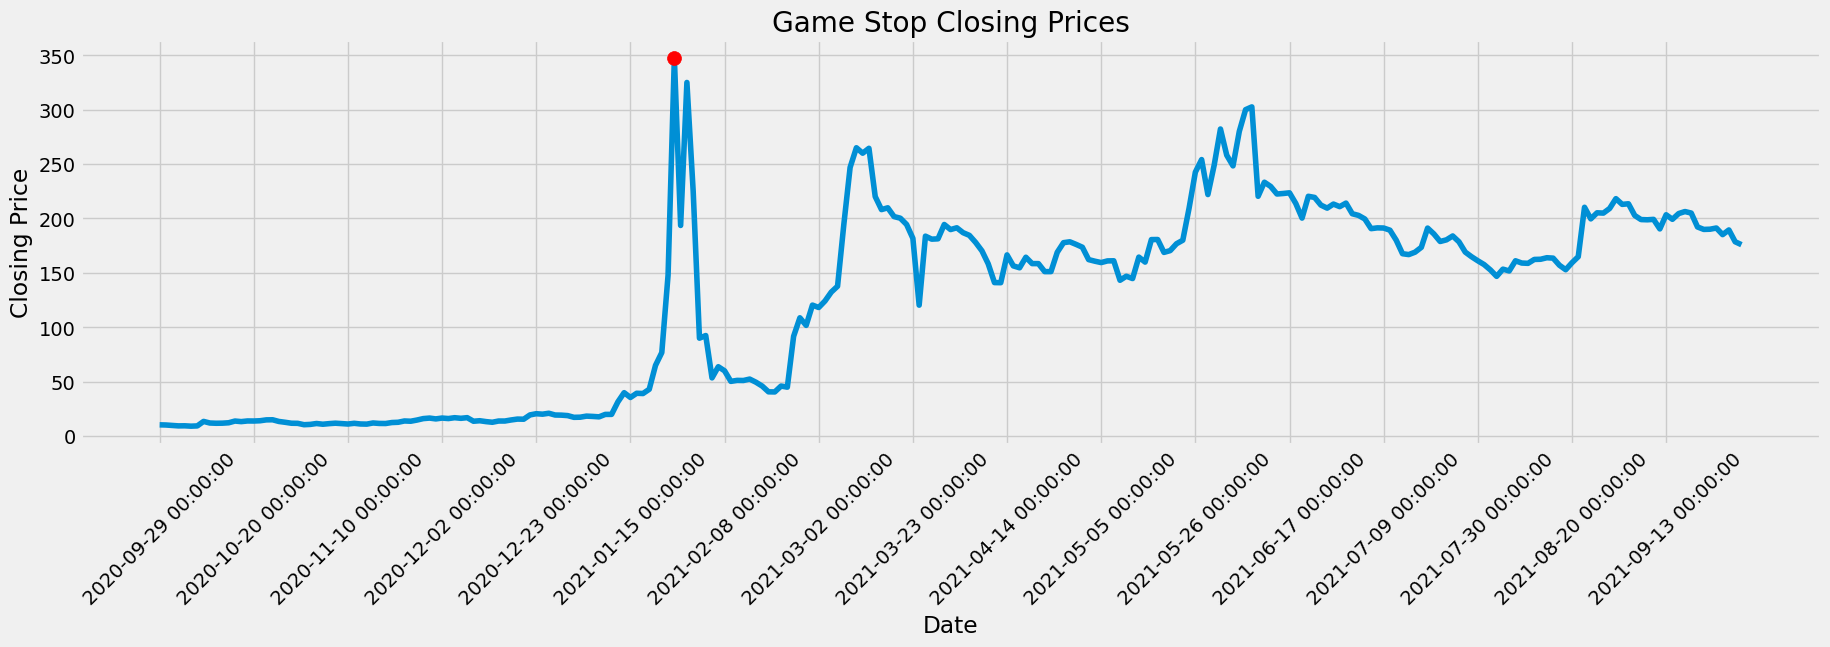

In [44]:
#Copy the code from the previous code cell and tweak it as just described:
#   by adding a s=100 parameter
#   by adding 2 zorder parameters 
plt.figure(figsize =(20,5))
plt.plot(game_stop["date"], game_stop['close'], zorder = 1)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Game Stop Closing Prices")
plt.xticks(np.arange(0,len(game_stop),15), rotation=45)
plt.scatter(peak_date, peak_closing_price, color = "red", s = 100, zorder = 2)



---

Let's close the  game stop connection as we are moving on to another  data set.

In [45]:
conn2.close()

---

###  Transforming logarithmic or exponential data

In 2007, a university study was published investigating the crash risk of alcohol impaired driving. Data from 2,871 crashes were used to measure the association of a person’s blood alcohol level (BAC) with the risk of being in an accident. The alcohol data frame below shows results from the [study](https://opentextbc.ca/algebratrigonometryopenstax/chapter/fitting-exponential-models-to-data/#return-footnote-74-1). 

The relative risk is a measure of how many times more likely a person is to crash. So, for example, a person with a BAC of 0.09 is 3.54 times as likely to crash as a person who has not been drinking alcohol.

In [46]:
#Don't let this code bother you.  Instead of using a csv, I'm hard coding data cause it was simpler for this little example.

#If you know what a DICTIONARY is, notice that I am using one here to map a column header to its list of data.
alcohol = pd.DataFrame({"BAC" : [0,0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.21],
                        "risk": [1,1.03,1.06,1.38,2.09,3.54,6.41,12.6,22.1,39.05,65.32,99.78]})

alcohol

,BAC,risk
0,0.00,1.00
1,0.01,1.03
2,0.03,1.06
3,0.05,1.38
4,0.07,2.09
5,0.09,3.54
6,0.11,6.41
7,0.13,12.60
8,0.15,22.10
9,0.17,39.05


---

# Question 6

Create a scatter plot of this data with the BAC on the x axis and the relative risk on the y axis.

Of course, give an appropriate title and include labels.

Text(0.5, 1.0, 'BAC to Risk Level')

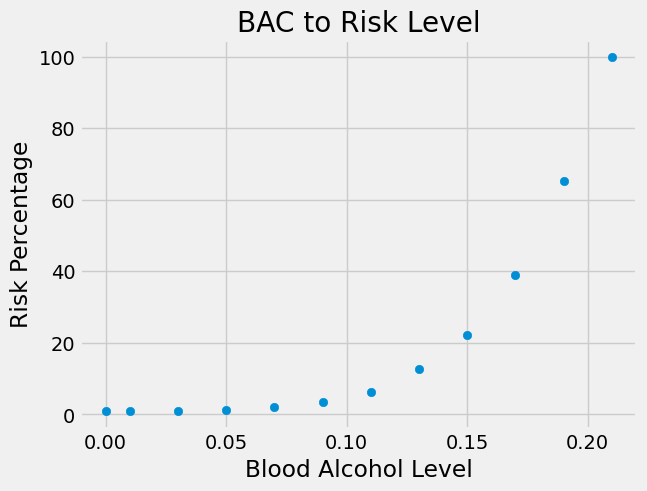

In [47]:
#Your plot here
plt.scatter(alcohol["BAC"], alcohol["risk"])
plt.xlabel("Blood Alcohol Level")
plt.ylabel("Risk Percentage")
plt.title("BAC to Risk Level")

---

You should should notice that the risk is rising exponentially, ie, risk appears to be rising like $$e ^ {BAC}$$.

If you remember your logarithmic/exponential rules, another way to denote this same relationship is: 

$$risk \approx e ^ {BAC}  \,\,\,\, \implies \,\,\,\, BAC \approx \log risk$$

This suggests that BAC should increase as log risk increases, and thus show a positive linear relationship.  Let's transform our data and see this.

---

# Question 7

A) We can use ``np.log`` to take the log of each value in an array in an elementwise fashion.  Essentially, we just need to pass a column in to ``np.log(XXX)`` as such:

* ``np.log(my_dataframe["column_name"])``

Use this method to craete a column ```log_risk``` in the ``alchohol`` dataframe that contains the log of each Risk value.

In [52]:
#Replcae the ellipsis with the log of the risk values in the alcohol table

alcohol["log_risk"] = np.log(alcohol["risk"]) #This creates a new column called log_risk

alcohol  #repeating so that you can see the new column


,BAC,risk,log_risk
0,0.00,1.00,0.000000
1,0.01,1.03,0.029559
2,0.03,1.06,0.058269
3,0.05,1.38,0.322083
4,0.07,2.09,0.737164
5,0.09,3.54,1.264127
6,0.11,6.41,1.857859
7,0.13,12.60,2.533697
8,0.15,22.10,3.095578
9,0.17,39.05,3.664843


B) Now create a scatter plot of the ```BAC``` versus ```log_risk``` data. 

Make the title "Risk from Blood Alchohol (BAC)" with an x label of "BAC" and a y label of "Risk (log)" 

Text(0.5, 1.0, 'BAC to Risk (Log)')

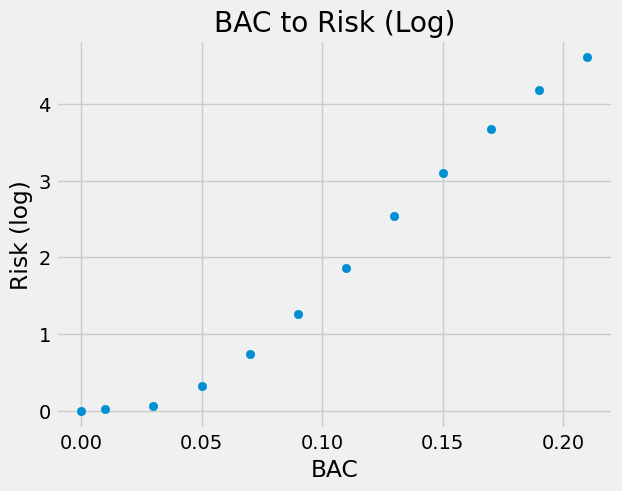

In [53]:
#Your plot here
plt.scatter(alcohol["BAC"], alcohol["log_risk"])
plt.xlabel("BAC")
plt.ylabel("Risk (log)")
plt.title("BAC to Risk (Log)")

Since we deduced that $BAC \approx \log Risk$, plot points should look more linear than the plot from Question 5.

C) Find the table of correlation coefficients for the ``alchohol`` dataframe.

In [54]:
#Your work here
corr = alcohol.corr()
corr

,BAC,risk,log_risk
BAC,1.000000,0.831378,0.985505
risk,0.831378,1.000000,0.870858
log_risk,0.985505,0.870858,1.000000


Take note of the correlation between BAC vs. Risk  (0.831378) and also Bac vs. Log Risk (0.985505).  Sinnce the latter is closer to 1, it does appear that the log of the risk has a high linear relationship with the BAC.

---

##  Suggestions for Cheat sheet

Do you have examples of these in your cheat sheet?

* How to make a scatter graph?
* How to find correlation coefficients?
* The ranges for strong/medium/weak correlation
* How to draw a red dot of varying size on a plot
* How to use zorder to reorder what graphs appear on top
* How to use np.log to take the log of values in a column

---

You're done! Yay!  Hopefully you now feel confident in creating scatter plots.